In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

In [2]:
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
os.chdir("D://BIT_study_related//Thesis//Data_Monthly")
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('CO2_date_index.csv',index_col='Months',parse_dates=['Months'], date_parser=dateparse)
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,mean
Months,
2014-11-01,395.637395
2014-12-01,397.559220
2015-01-01,397.419025
2015-02-01,398.980959
2015-03-01,399.970865
...,...
2022-10-01,413.995709
2022-11-01,416.944042
2022-12-01,417.970509


In [4]:
train = df.iloc[:81]
test = df.iloc[81:]

In [5]:
train_prophet = train.reset_index() \
    .rename(columns={'Months':'ds',
                     'mean':'y'})

In [6]:
%%time
model = Prophet()
model.fit(train_prophet)

13:49:56 - cmdstanpy - INFO - Chain [1] start processing
13:49:57 - cmdstanpy - INFO - Chain [1] done processing


CPU times: total: 297 ms
Wall time: 1.64 s


In [7]:
# Predict on test set with model
test_prophet = test.reset_index() \
    .rename(columns={'Months':'ds',
                     'mean':'y'})

test_fcst = model.predict(test_prophet)

In [8]:
test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-05-01,416.256374,418.702909,421.037522,416.251204,416.261321,3.738110,3.738110,3.738110,3.738110,3.738110,3.738110,0.0,0.0,0.0,419.994484
1,2022-06-01,416.552903,415.758153,418.082564,416.520140,416.581467,0.374001,0.374001,0.374001,0.374001,0.374001,0.374001,0.0,0.0,0.0,416.926903
2,2022-07-01,416.839866,414.197032,416.531304,416.764936,416.906655,-1.409886,-1.409886,-1.409886,-1.409886,-1.409886,-1.409886,0.0,0.0,0.0,415.429980
3,2022-08-01,417.136394,413.423740,415.720076,417.004471,417.252840,-2.596844,-2.596844,-2.596844,-2.596844,-2.596844,-2.596844,0.0,0.0,0.0,414.539550
4,2022-09-01,417.432923,413.562431,415.953868,417.242401,417.601887,-2.637531,-2.637531,-2.637531,-2.637531,-2.637531,-2.637531,0.0,0.0,0.0,414.795392


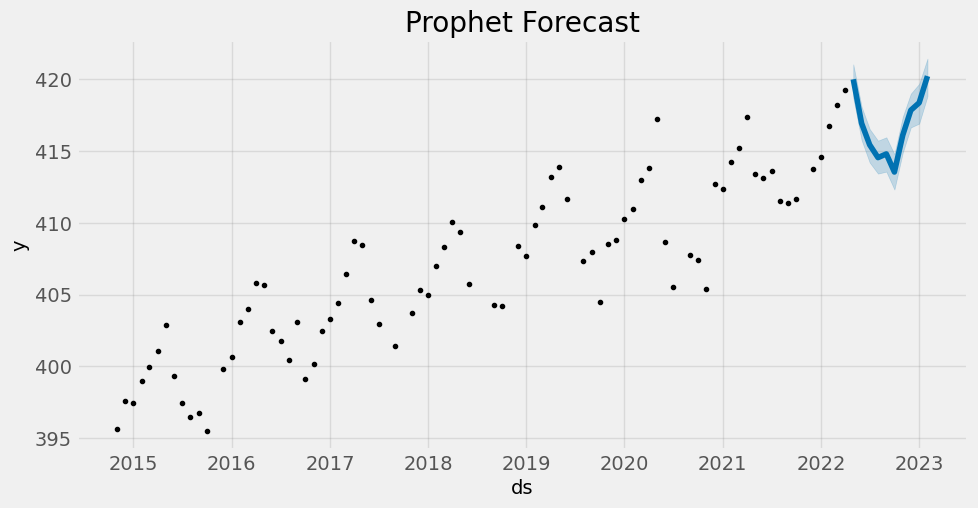

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(test_fcst, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

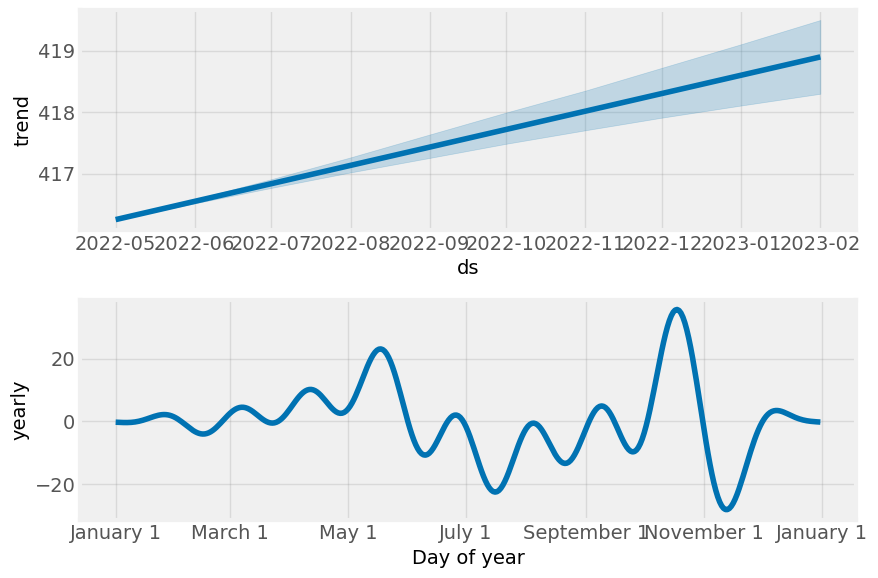

In [12]:
fig = model.plot_components(test_fcst)
plt.show()

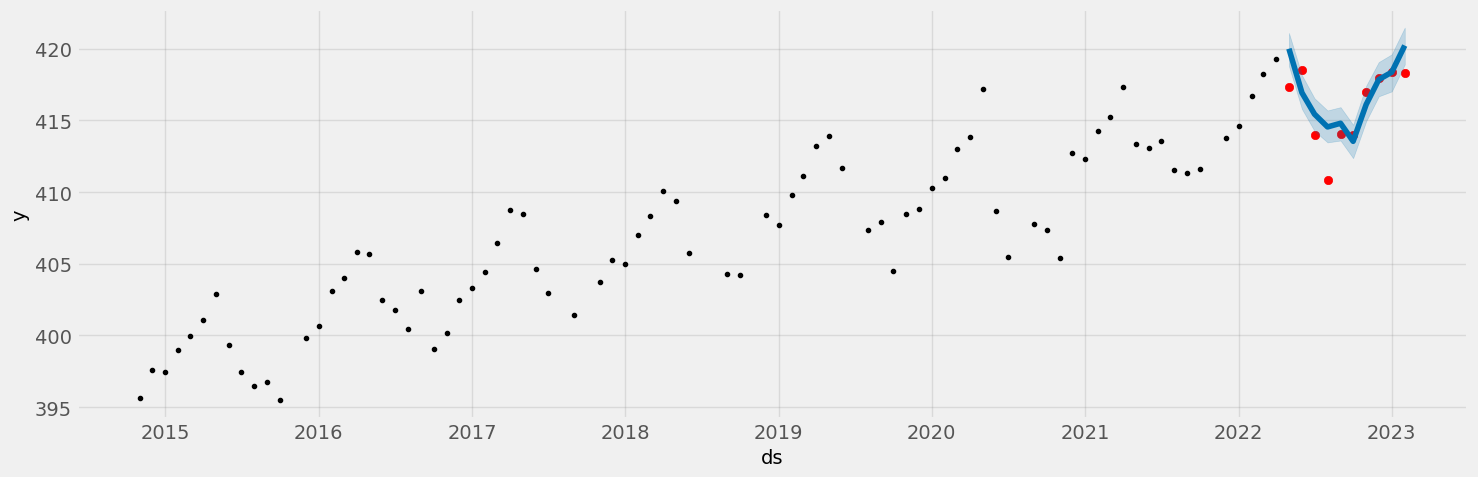

In [13]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test.index, test['mean'], color='r')
fig = model.plot(test_fcst, ax=ax)

In [17]:
np.sqrt(mean_squared_error(y_true=test['mean'],
                   y_pred=test_fcst['yhat']))

1.7527723231714278

In [20]:
mean_absolute_error(y_true=test['mean'],
                   y_pred=test_fcst['yhat'])

1.3536909915584316

In [21]:
mean_absolute_percentage_error(y_true=test['mean'],
                   y_pred=test_fcst['yhat'])

0.3260928966811937

In [10]:
future = model.make_future_dataframe(periods=20, freq='m', include_history=False)
future.head()

,ds
0,2022-04-30
1,2022-05-31
2,2022-06-30
3,2022-07-31
4,2022-08-31


In [11]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
15,2023-07-31,416.608449,414.923132,418.437108
16,2023-08-31,416.367116,414.493071,418.266905
17,2023-09-30,414.809031,412.956178,416.749255
18,2023-10-31,424.522727,422.485809,426.643089
19,2023-11-30,419.769129,417.566041,421.998862


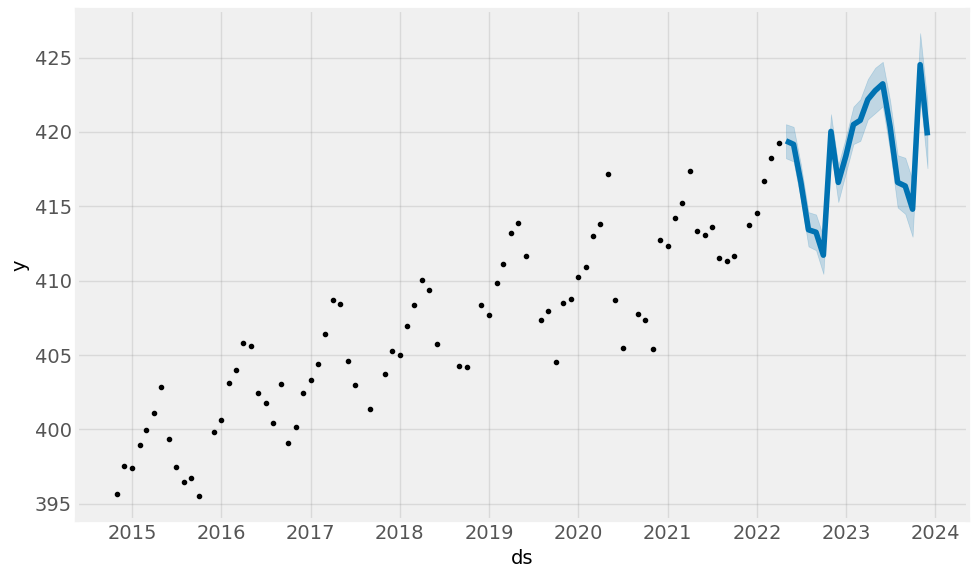

In [12]:
fig1 = model.plot(forecast)

In [13]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-04-30,416.246809,418.232817,420.523020,416.240950,416.252823,3.155384,3.155384,3.155384,3.155384,3.155384,3.155384,0.0,0.0,0.0,419.402192
1,2022-05-31,416.543337,418.016003,420.344336,416.513940,416.575005,2.625726,2.625726,2.625726,2.625726,2.625726,2.625726,0.0,0.0,0.0,419.169064
2,2022-06-30,416.830300,415.446909,417.814532,416.760678,416.900155,-0.220334,-0.220334,-0.220334,-0.220334,-0.220334,-0.220334,0.0,0.0,0.0,416.609966
3,2022-07-31,417.126829,412.307151,414.611580,417.014404,417.255681,-3.701391,-3.701391,-3.701391,-3.701391,-3.701391,-3.701391,0.0,0.0,0.0,413.425438
4,2022-08-31,417.423358,412.048918,414.450806,417.258711,417.614959,-4.164307,-4.164307,-4.164307,-4.164307,-4.164307,-4.164307,0.0,0.0,0.0,413.259050


In [14]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
15,2023-07-31,420.618215,414.923132,418.437108,419.425322,421.927786,-4.009766,-4.009766,-4.009766,-4.009766,-4.009766,-4.009766,0.0,0.0,0.0,416.608449
16,2023-08-31,420.914743,414.493071,418.266905,419.588442,422.386732,-4.547627,-4.547627,-4.547627,-4.547627,-4.547627,-4.547627,0.0,0.0,0.0,416.367116
17,2023-09-30,421.201707,412.956178,416.749255,419.785295,422.783526,-6.392676,-6.392676,-6.392676,-6.392676,-6.392676,-6.392676,0.0,0.0,0.0,414.809031
18,2023-10-31,421.498235,422.485809,426.643089,419.951266,423.215526,3.024492,3.024492,3.024492,3.024492,3.024492,3.024492,0.0,0.0,0.0,424.522727
19,2023-11-30,421.785198,417.566041,421.998862,420.055483,423.670300,-2.016069,-2.016069,-2.016069,-2.016069,-2.016069,-2.016069,0.0,0.0,0.0,419.769129


In [15]:
final_1 = forecast.loc[:,['ds','yhat']]
final_1.reset_index() \
    .rename(columns={'ds':'Months',
                     'yhat':'mean'},inplace=True)
#df.drop('Unnamed: 0',axis=1,inplace=True)
final_1

,ds,yhat
0,2022-04-30,419.402192
1,2022-05-31,419.169064
2,2022-06-30,416.609966
3,2022-07-31,413.425438
4,2022-08-31,413.259050
5,2022-09-30,411.716191
6,2022-10-31,420.035319
7,2022-11-30,416.609361
8,2022-12-31,418.383943
9,2023-01-31,420.494975
